In [93]:
import yfinance as yf
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [21]:
start = "2012-01-01"
stop = "2022-12-21"
stock_sym = "GOOG"

data = yf.download(stock_sym,start,stop)

[*********************100%%**********************]  1 of 1 completed


In [23]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [25]:
data.reset_index(inplace=True)

In [27]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [29]:
mv_avg100 = data["Close"].rolling(100).mean()

In [31]:
mv_avg100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2756    103.6147
2757    103.4723
2758    103.2449
2759    102.9905
2760    102.7204
Name: Close, Length: 2761, dtype: float64

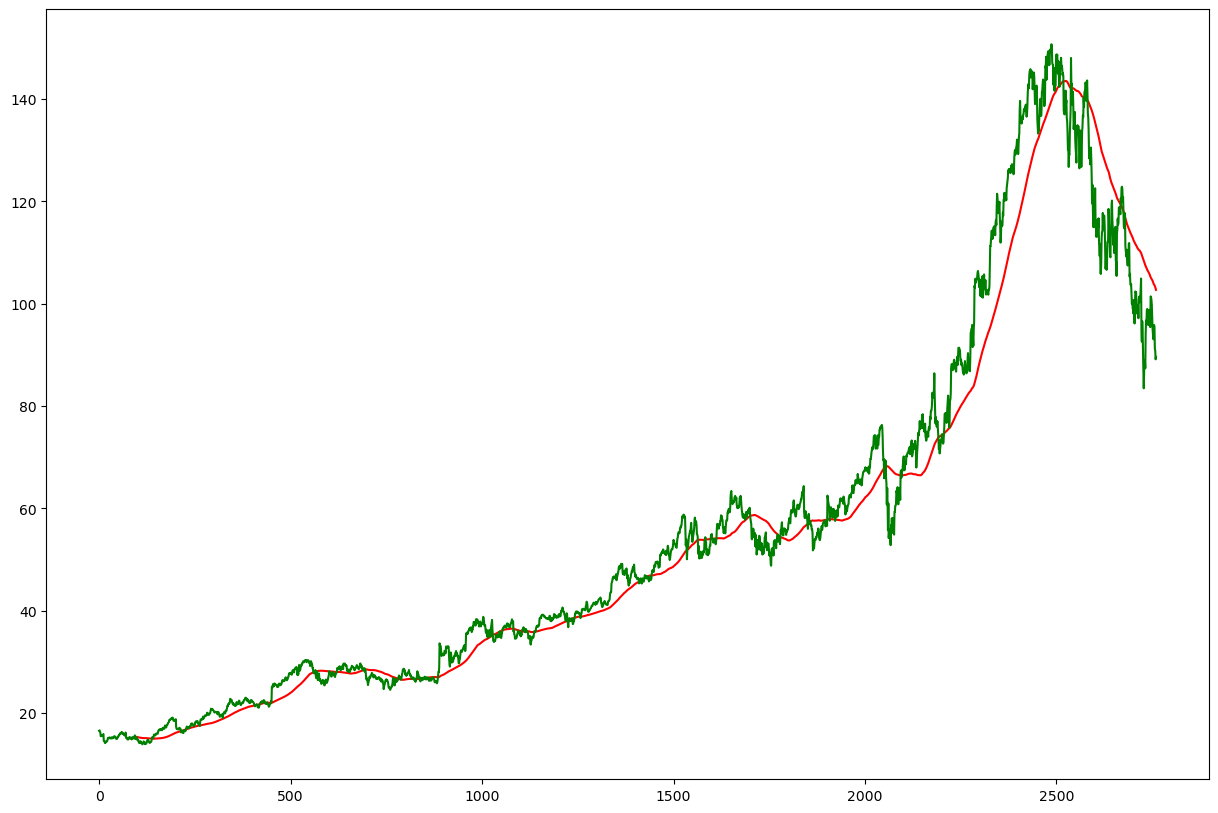

In [37]:
plt.figure(figsize=(15,10))
plt.plot(mv_avg100,'r')
plt.plot(data["Close"],'g')
plt.show()

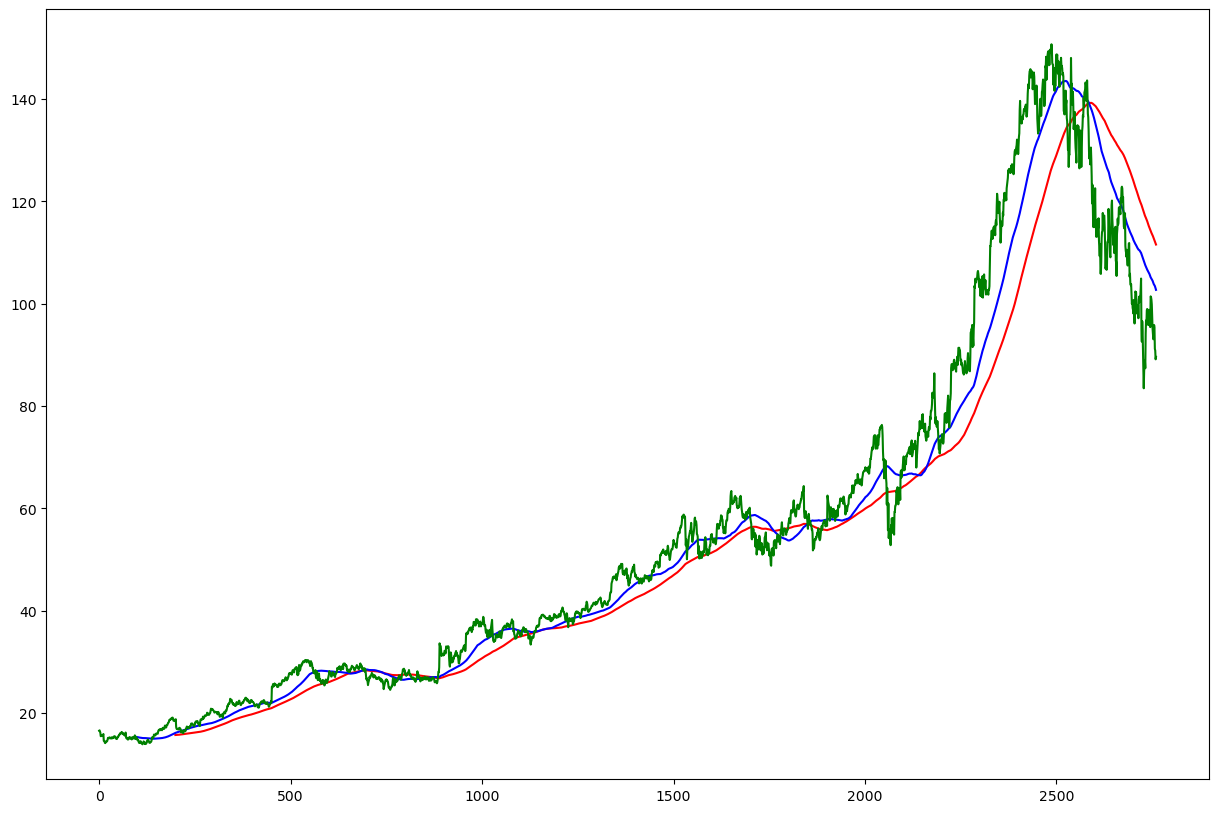

In [43]:
mv_avg200 = data["Close"].rolling(200).mean()
plt.figure(figsize=(15,10))
plt.plot(mv_avg200,'r')
plt.plot(mv_avg100,'b')
plt.plot(data["Close"],'g')
plt.show()

In [45]:
data.dropna(inplace=True)

In [55]:
train = pd.DataFrame(data["Close"][0:int(len(data)*0.8)])

In [53]:
test = pd.DataFrame(data["Close"][(int(len(data)*0.8)):])

In [61]:
test.shape

(553, 1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
train_scale = scaler.fit_transform(train)

In [89]:
x=[]
y=[]
for i in range(100,train_scale.shape[0]):
    x.append(train_scale[i-100:i])
    y.append(train_scale[i,0])

In [95]:
x = np.array(x)
y = np.array(y)

In [77]:
train_scale.shape

(2208, 1)

In [81]:
from keras.layers import Dense,Dropout,LSTM

In [83]:
from keras.models import Sequential

In [85]:
model = Sequential()

In [105]:
model.add(tf.keras.layers.Input(shape=(x.shape[1],1)))
model.add(LSTM(units=50,activation="relu",return_sequences=True))

In [109]:
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [111]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [115]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 185ms/step - loss: 0.0688
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0085
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0043
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - loss: 0.0047
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 0.0045
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0049
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - loss: 0.0037
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - loss: 0.0043
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - loss: 0.0039
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - loss: 0.0037
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 180ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [117]:
past_100 = train.tail(100)
data_test = pd.concat([past_100,test],ignore_index=True)
test_scale = scaler.fit_transform(data_test)

In [119]:
x1=[]
y1=[]
for i in range(100,test_scale.shape[0]):
    x1.append(test_scale[i-100:i])
    y1.append(test_scale[i,0])

In [121]:
x1 = np.array(x1)
y1 = np.array(y1)

In [123]:
y_pred = model.predict(x1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step


In [124]:
scale = 1/scaler.scale_

In [125]:
y_pred  = y_pred*scale
y1 = y1*scale

In [197]:
x1.shape

(553, 100, 1)

In [199]:
y_pred.shape

(553, 1)

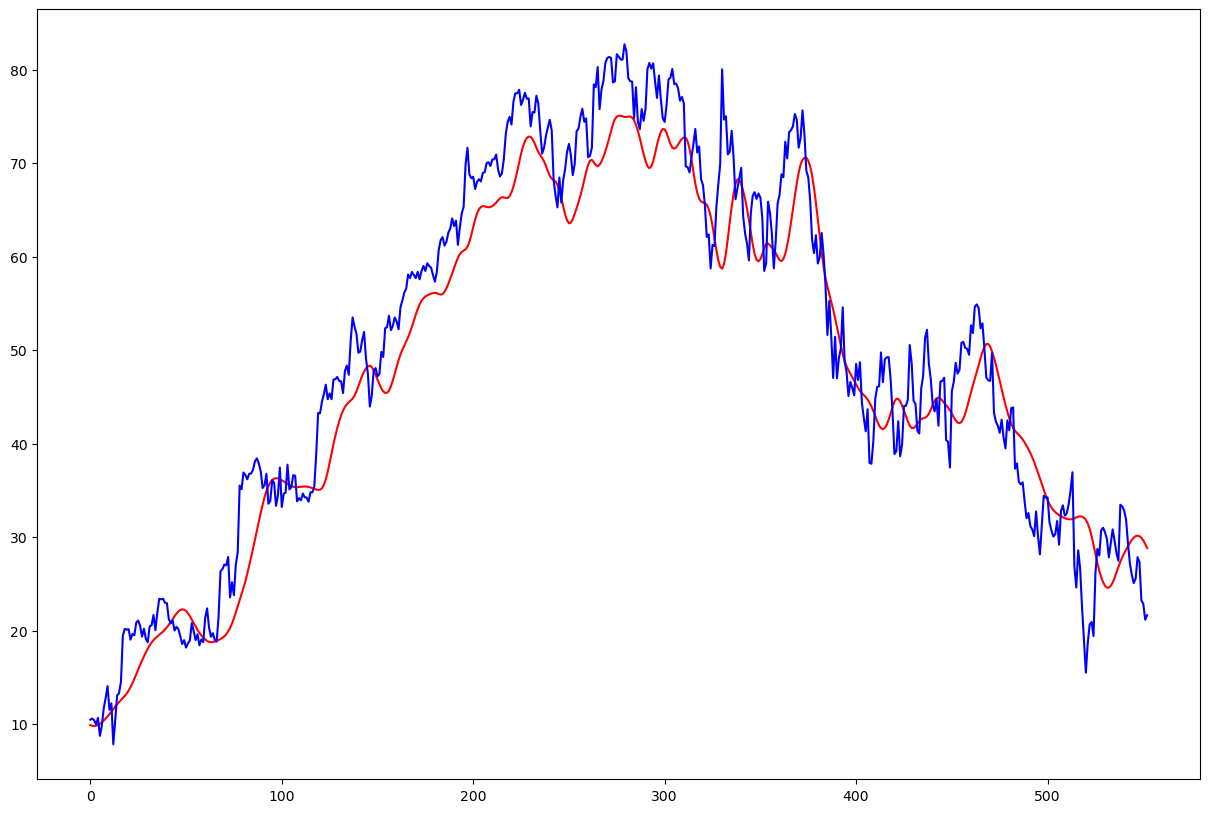

In [131]:
plt.figure(figsize=(15,10))
plt.plot(y_pred,'r')
plt.plot(y1,'b')
plt.show()

In [279]:
from datetime import datetime, timedelta
# Define the ticker symbol
ticker_symbol = 'GOOG'
stock_data = yf.Ticker(ticker_symbol)
stock_data = stock_data.history(period='6mo')  
print(stock_data.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-06-14 00:00:00-04:00  175.852005  178.729996  175.852005  178.369995   
2024-06-17 00:00:00-04:00  176.979996  179.919998  176.490005  178.779999   
2024-06-18 00:00:00-04:00  178.789993  178.910004  175.619995  176.449997   
2024-06-20 00:00:00-04:00  176.710007  178.740005  176.460007  177.710007   
2024-06-21 00:00:00-04:00  178.490005  182.511993  178.059998  180.259995   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-06-14 00:00:00-04:00  12361600        0.0           0.0  
2024-06-17 00:00:00-04:00  15272900        0.0           0.0  
2024-06-18 00:00:00-04:00  15640300        0.0           0.0  
2024-06-20 00:00:00-04:00  16753200        0.0           0.0  
2024-06-21 00:00:00-04:00  58903200        0.0           0.0  


In [281]:
stock_data=stock_data.tail(100)

In [283]:
stock_data.reset_index(inplace=True)

In [285]:
stock_data=pd.DataFrame(stock_data["Close"])

In [301]:
stock_data_scale = scaler.fit_transform(stock_data)

In [303]:
stock_data_scale=stock_data_scale.reshape((1,100,1))

In [305]:
prediction = model.predict(stock_data_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([0.77780265], dtype=float32)

In [329]:
stock_data_scale[0].shape

(100, 1)

In [335]:
stock_data_scale[0]=np.append(stock_data_scale[0],prediction,axis=0)[1:]

In [337]:
stock_data_scale.shape

(1, 100, 1)

In [349]:
for i in range(10):
    stock_data_scale[0]=np.append(stock_data_scale[0],prediction,axis=0)[1:]
    prediction = model.predict(stock_data_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [353]:
scaler.inverse_transform(stock_data_scale[0])[-10:]

array([[175.06893737],
       [174.88212904],
       [174.50358962],
       [173.97909568],
       [173.36178225],
       [172.70039213],
       [172.03205993],
       [171.38109717],
       [170.76074909],
       [170.17623507]])

In [361]:
import keras
keras.saving.save_model(model,"stock_predictor.keras")

In [363]:
import joblib
joblib.dump(scaler,"sc.pkl")

['sc.pkl']